# Getting radial plot in IQ plane for 2pi jump

This notebook will allow for playing to get the appropriate functions.

In [1]:
# . Honours Module Folder
# ├ FYPLibrary
# | ├ file_reading.py
# | └ IQ_demod.py
# └ Sub Project folder i.e.: os.path.abspath('')
#   ├ this notebook(.ipynb)
#   └ "Batch" folder
#     └ C2-xxxHz-xxxmVpp-80.125xxxMHz-comment.txt

# Initialization: Directory appending for my system. Vary the directories as necessary.
import sys
import os.path
# Add the FYPLibrary folder in the same level as this folder.
parent_dir = os.path.dirname(os.path.abspath(''))
if os.path.join(parent_dir, 'FYPLibrary') not in sys.path:
    sys.path.append(os.path.join(parent_dir, 'FYPLibrary'))
del parent_dir

# from pprint import pprint
# pprint(sys.path)

# within this jupyter notebook
# from os import listdir
from file_reading import *
from IQ_demod import *
import numpy as np
import matplotlib.pyplot as plt

Reading from trace

In [2]:
# Step 1: Change the name to which the folder you wish to read from
# Yield all files in batch folder
folderpath = os.path.join(os.path.abspath(''),'traces')
file = os.path.join(folderpath, 'C1-004Hz-020.4mVpp-80.125000MHz-OneAmp00001.txt')
NAME = os.path.basename(file)
print(f"{NAME = }\n{file = }")

NAME = 'C1-004Hz-020.4mVpp-80.125000MHz-OneAmp00001.txt'
file = 'c:\\Users\\Thormund\\ThormundNUS\\PC4199 Honours Project\\20220310 Report Figures\\traces\\C1-004Hz-020.4mVpp-80.125000MHz-OneAmp00001.txt'


In [3]:
# Step 2: Init appropriate variables
SIGNAL_F = 80.125e6 *2
SAMPLING_F = 1e6
N, _ = freq_ratio(signal= SIGNAL_F, sample= SAMPLING_F)
ph_ad = phase_advance(SIGNAL_F, SAMPLING_F) # phase advance = 2*pi/N
print(f"{N = }\nSIGNAL_F = {SIGNAL_F/1e6 }MHz\nph_ad={ph_ad/np.pi} pi")

N = 4
SIGNAL_F = 160.25MHz
ph_ad=0.5 pi


In [4]:
# Step 3: Get the radii and theta
meta, trace = fr.parse_and_read_oscilliscope_txt(file)
signal = signal_from_trace(np.asarray(trace))
phases = signal_to_phase(signal, N, ph_ad, phase_advancement_correction= False)
phases = phase_reconstruction_2(phases, ph_ad)
radii = get_R_signal(signal, N, ph_ad)
t_axis = np.arange(start= 0, 
    stop= (int(meta["Record Length"][0])-N+1) * meta['Sample Interval'][0], step= meta['Sample Interval'][0])


[Notice] Ignore the following mixed types warning.
[Log] file supplied = c:\Users\Thormund\ThormundNUS\PC4199 Honours Project\20220310 Report Figures\traces\C1-004Hz-020.4mVpp-80.125000MHz-OneAmp00001.txt
[Log] meta = {'Record Length': (500002.0, 'Points'), 'Sample Interval': (1e-06, 's'), 'Trigger Point': (250000.0, 'Samples'), 'Trigger Time': (0.0512414, 's'), 'Horizontal Offset': (-0.25, 's')}


c:\Users\Thormund\ThormundNUS\PC4199 Honours Project\FYPLibrary\file_reading.py:171: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_temp = pd.read_csv(txtfilepath, delimiter=' ', header=None,


In [77]:
zoom_in_start = 113695
zoom_in_end = zoom_in_start + 7

Voltage over time

C:\Users\Thormund\AppData\Local\Temp\ipykernel_2440\3559136468.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(t_axis[zoom_in_start:zoom_in_end+6]*1e6,


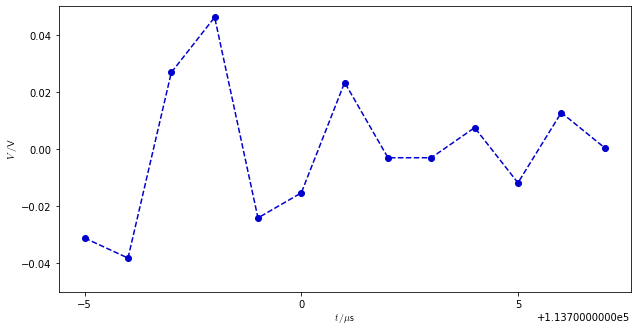

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis[zoom_in_start:zoom_in_end+6]*1e6, 
    signal[zoom_in_start:zoom_in_end+6], 'bo', color = 'mediumblue', linestyle='dashed')
# plt.grid(True, which='major', axis='both')
ax.set_ylabel(r'$V$/V', usetex = True)
ax.set_xlabel(r'$t$/$\mu$s', usetex = True)
ax.set_ylim(-0.05, 0.05)
plt.locator_params(axis= 'x', tight= None, nbins= 4)
# fig.set_size_inches(0.85*(8.25-0.875*2), 2.7)
fig.set_size_inches(11.75-1.5, (8.25-2 - 1))  

$\phi_d$ observed

C:\Users\Thormund\AppData\Local\Temp\ipykernel_2440\4199629900.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot(t_axis[zoom_in_start:zoom_in_end+6]*1e6,


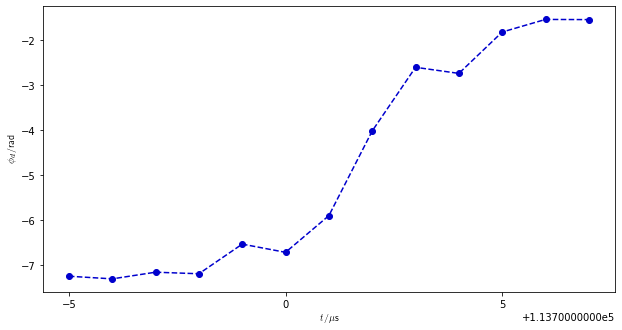

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t_axis[zoom_in_start:zoom_in_end+6]*1e6, 
    phases[zoom_in_start:zoom_in_end+6], 'bo', color = 'mediumblue', linestyle='dashed')
# plt.grid(True, which='major', axis='both')
ax.set_ylabel(r'$\phi_d$/rad', usetex = True)
ax.set_xlabel(r'$t$/$\mu$s', usetex = True)
# ax.set_ylim(-0.05, 0.05)
plt.locator_params(axis= 'x', tight= None, nbins= 4)
# fig.set_size_inches(0.85*(8.25-0.875*2), 2.7)
fig.set_size_inches(11.75-1.5, (8.25-2 - 1)) 

Plotting IQ plane

In [80]:
from scipy.interpolate import interp1d

In [81]:
def polar(x, y) -> tuple:
    """returns rho, theta (degrees)"""
    return np.hypot(x, y), np.arctan2(y, x)

In [82]:
Is, Qs = get_Is_Qs(signal, N, ph_ad)


In [83]:
Is = Is[zoom_in_start+N:zoom_in_end+N]
Qs = Qs[zoom_in_start+N:zoom_in_end+N]

In [84]:
Rs, thetas = polar(Is, Qs)

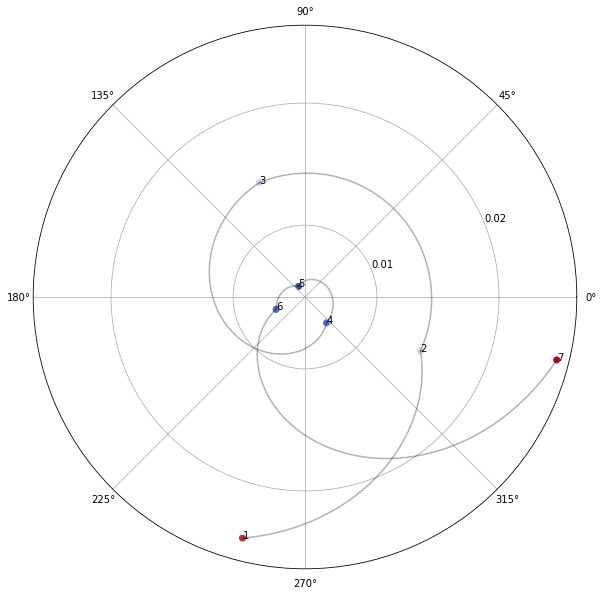

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': 'polar'})
ax.scatter(thetas, Rs, c= 100*Rs/np.max(Rs), cmap= 'coolwarm')
for i, t in enumerate(zip(thetas, Rs)):
    ax.annotate(i+1, t)
ax.set_rticks([0.010, 0.02, 0.03], minor= False)
# ax.set_theta_offset(-np.pi)
# ax.set_thetalim(-np.pi / 1, np.pi / 1.5)

my_zip = list(zip(thetas, Rs))
for i in range(len(my_zip)-1):
    (th1, r1) = my_zip[i]
    (th2, r2) = my_zip[i+1]
    if th2 < th1: th2 += 2*np.pi
    th_space = np.linspace( th1, th2, 100)
    r_space = np.linspace( r1, r2, 100)
    ax.plot(th_space, r_space, color='black', alpha= 0.3 )
fig.set_size_inches(10, 10) 